In [17]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import time
%matplotlib inline

In [2]:
# One building with one year data is extracted for demo
features = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'Filter_One_year_features' + '.csv')
targets = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'Filter_One_year_target' + '.csv')

In [3]:
features.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(Dew PointC - Humidity),PERCENTILE(seasonal_num - WindDirDegrees),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(seasonal_num - TemperatureC),PERCENTILE(Humidity - Sea Level PressurehPa),PERCENTILE(Dew PointC - WindDirDegrees),PERCENTILE(Humidity - TemperatureC),PERCENTILE(Humidity - seasonal_num),PERCENTILE(Humidity - WindDirDegrees),PERCENTILE(Sea Level PressurehPa - TemperatureC)
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.026712,0.082820,0.716381,0.615183,0.992865,0.111358,0.983847,0.997260,0.232477,0.461701
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.102568,0.057477,0.709817,0.602911,0.964269,0.077169,0.919121,0.951998,0.158619,0.439897
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.026712,0.113299,0.739783,0.615183,0.994406,0.147945,0.983847,0.997260,0.269521,0.439897
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.043208,0.113299,0.707192,0.628139,0.987900,0.142694,0.968037,0.988128,0.259532,0.457877


In [4]:
targets.head()

,0
0,63.50
1,60.75
2,64.75
3,65.25
4,62.50


# Remove collinear features - FeatureSelector

In [5]:
X = features
y = targets

In [6]:
fs = FeatureSelector(data = X, labels = y)

In [7]:
fs.identify_collinear(correlation_threshold = 0.98, one_hot=True)

2384 features with a correlation magnitude greater than 0.98.



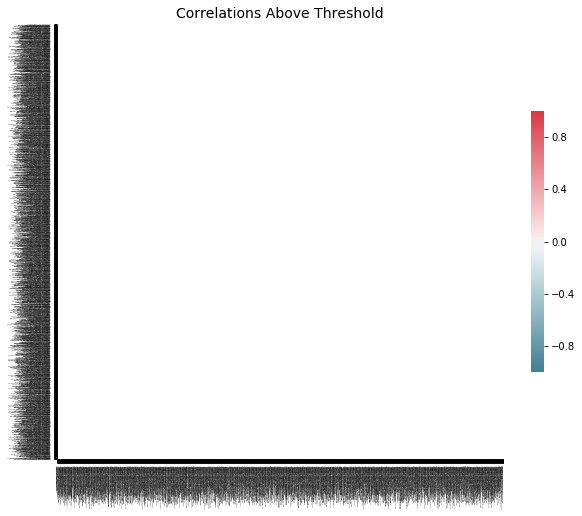

In [8]:
# heatmap shows all the features that have at least one correlation above the threshold
fs.plot_collinear()#plot_all=True)

In [9]:
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear.head(10)

,drop_feature,corr_feature,corr_value
0,seasonal_num / Sea Level PressurehPa,seasonal_num,0.999916
1,Humidity / TemperatureC,Dew PointC / TemperatureC,-0.999765
2,Humidity / Sea Level PressurehPa,Humidity,0.999503
3,seasonal_num / Dew PointC,TemperatureC / Dew PointC,0.981198
4,Dew PointC / Sea Level PressurehPa,Dew PointC,0.999959
5,WindDirDegrees / Sea Level PressurehPa,WindDirDegrees,0.999843
6,Sea Level PressurehPa / seasonal_num,Humidity / seasonal_num,0.990495
7,Humidity / Dew PointC,TemperatureC / Dew PointC,0.999837
8,Humidity / Dew PointC,seasonal_num / Dew PointC,0.981022
9,Sea Level PressurehPa / WindDirDegrees,Humidity / WindDirDegrees,0.999985


In [10]:
# Remove the collinear features  
X_collinear = fs.remove(methods = ['collinear'], keep_one_hot=True)

Removed 2384 features.


In [11]:
X_collinear.head()

,seasonal_num,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,Wind Direction = SE,Wind Direction = WNW,Wind Direction = NW,Wind Direction = West,Wind Direction = South,...,PERCENTILE(Sea Level PressurehPa * seasonal_num),PERCENTILE(Humidity * seasonal_num),PERCENTILE(Dew PointC * WindDirDegrees),PERCENTILE(TemperatureC * WindDirDegrees),PERCENTILE(Dew PointC * TemperatureC),PERCENTILE(seasonal_num * WindDirDegrees),PERCENTILE(Dew PointC * seasonal_num),PERCENTILE(seasonal_num * TemperatureC),PERCENTILE(Dew PointC - Sea Level PressurehPa),PERCENTILE(Sea Level PressurehPa - TemperatureC)
0,1,3.9,100.0,3.9,1007.3,0,0,0,0,0,...,0.119578,0.819463,0.693664,0.538870,0.285502,0.798973,0.565068,0.392466,0.716381,0.461701
1,1,4.4,93.0,3.3,1006.9,0,0,0,0,0,...,0.111815,0.778767,0.676541,0.563927,0.281393,0.820434,0.552968,0.404452,0.709817,0.439897
2,1,3.9,100.0,3.9,1006.4,0,0,1,0,0,...,0.104281,0.819463,0.689840,0.534932,0.285502,0.771861,0.565068,0.392466,0.739783,0.439897
3,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.105993,0.810616,0.648459,0.513014,0.248459,0.771861,0.539840,0.378482,0.707192,0.457877
4,1,3.3,97.0,2.8,1006.5,0,0,1,0,0,...,0.105993,0.810616,0.648459,0.513014,0.248459,0.771861,0.539840,0.378482,0.707192,0.457877


# Remove features with low variance - SKlearn

In [12]:
print(X_collinear.shape)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_collinear_Variance = sel.fit_transform(X_collinear)
print(X_collinear_Variance.shape)
# VarianceThreshold has removed columns with zero-variance more than 80% of the samples

(8760, 474)
(8760, 350)


In [13]:
X_collinear_Variance = pd.DataFrame(X_collinear_Variance)
X_collinear_Variance.head()

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,1,3.9,100,3.9,1007.3,0,0,0,330,1,...,-230,3.88818,-0.00878788,-314.79,-1283.1,-83.6154,-230,0,-1007.29,-3.88818
1,1,4.4,93,3.3,1006.9,0,1,0,340,0,...,-247,3.29029,-0.01,-325.48,-1492.7,-102.28,-247,-374,-1006.89,-4.39029
2,1,3.9,100,3.9,1006.4,0,0,0,320,1,...,-220,3.88781,-0.0090625,-304.79,-1244.1,-81.0513,-220,0,-1006.39,-3.88781
3,1,3.3,97,2.8,1006.5,0,0,0,320,1,...,-223,2.79125,-0.0071875,-310.76,-1053.2,-113.437,-223,-160,-1006.49,-3.29125
4,1,3.3,97,2.8,1006.5,0,0,0,320,1,...,-223,2.79125,-0.0071875,-310.76,-1053.2,-113.437,-223,-160,-1006.49,-3.29125


# SelectPercentile based on mutual information - SKlearn

In [14]:
X_collinear_Variance_MI = SelectPercentile(mutual_info_regression, 20).fit_transform(X_collinear_Variance,y)
X_collinear_Variance_MI.shape

(8760, 70)

In [15]:
X_collinear_Variance_MI_score = pd.DataFrame({'Feature':list(pd.DataFrame(X_collinear_Variance).columns),
                                     'Scores':SelectPercentile(mutual_info_regression, 20).fit(X_collinear_Variance,y).scores_})
X_collinear_Variance_MI_score.sort_values(by='Scores', ascending=False).reset_index(drop=True)
# The feature labels are tramsformed to nemeric index due to the operation of VarianceThreshold

,Feature,Scores
0,316,0.209159
1,36,0.208511
2,294,0.203347
3,221,0.199965
4,129,0.193917
5,211,0.192244
6,101,0.188415
7,172,0.186498
8,67,0.184971
9,88,0.182015


In [16]:
pd.DataFrame(X_collinear_Variance_MI).head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,3.9,False,258.282,0.25641,3.9,3.9,3.9,3.9,390,258.282,...,6.173,1003.4,0.961,0,1283.1,-0.961,0,922.685,1003.4,0
1,4.4,False,228.841,0.227273,4.4,3.3,4.4,4.4,409.2,305.121,...,6.42688,1002.5,0.952688,-1.1,1491.6,-0.964516,-102.3,929.627,1002.5,-1.1
2,3.9,False,258.051,0.25641,3.9,3.9,3.9,3.9,390,258.051,...,6.164,1002.5,0.961,0,1244.1,-0.961,0,924.349,1002.5,0
3,3.3,False,305,0.30303,3.3,2.8,3.3,3.3,320.1,359.464,...,7.07629,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.53,1003.2,-0.5
4,3.3,False,305,0.30303,3.3,2.8,3.3,3.3,320.1,359.464,...,7.07629,1003.2,0.965979,-0.5,1052.7,-0.971134,-48.5,909.53,1003.2,-0.5


# Wrapper methods - Recursive feature elimination -SKlearn

In [20]:
start = time.time()
rf_r = RandomForestRegressor()
rfe = RFE(estimator=rf_r, step=10,verbose=True,n_features_to_select=None)#None means half features are selected
rfe = rfe.fit(X_collinear_Variance_MI, y)
end = time.time()
elapsed = end - start 
print('Time for RFE:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))

Fitting estimator with 70 features.
Fitting estimator with 60 features.
Fitting estimator with 50 features.
Fitting estimator with 40 features.
Time for RFE:00:00:10


In [23]:
X_collinear_Variance_MI_RFE = rfe.transform(X_collinear_Variance_MI)
X_collinear_Variance_MI_RFE.shape

(8760, 35)

In [26]:
pd.DataFrame(X_collinear_Variance_MI_RFE).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,3.9,False,258.282,3928.47,1007.3,260168,260168,0.392847,1007.3,0.392847,...,-749.018,-992.09,305.385,6.173,1003.4,0.961,1283.1,0,922.685,1003.4
1,4.4,False,305.121,4430.36,755.175,230420,307227,0.38418,1342.53,0.51224,...,-701.779,-992.38,306.17,6.42688,1002.5,0.952688,1491.6,-102.3,929.627,1002.5
2,3.9,False,258.051,3924.96,1006.4,259703,259703,0.392496,1006.4,0.392496,...,-748.349,-991.19,307.949,6.164,1002.5,0.961,1244.1,0,924.349,1002.5
3,3.3,False,359.464,3321.45,854,306982,361801,0.299522,1186.23,0.353008,...,-647.036,-997.26,205.814,7.07629,1003.2,0.965979,1052.7,-48.5,909.53,1003.2
4,3.3,False,359.464,3321.45,854,306982,361801,0.299522,1186.23,0.353008,...,-647.036,-997.26,205.814,7.07629,1003.2,0.965979,1052.7,-48.5,909.53,1003.2


In [28]:
X_collinear_Variance_MI_RFE_Score = pd.DataFrame({'Feature':list(pd.DataFrame(X_collinear_Variance_MI).columns),
                                      'Ranking':rfe.ranking_})
X_collinear_Variance_MI_RFE_Score.sort_values(by='Ranking').reset_index(drop=True)

,Feature,Ranking
0,0,1
1,48,1
2,55,1
3,26,1
4,27,1
5,28,1
6,54,1
7,31,1
8,32,1
9,33,1
